In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\\Data science\\glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
df[df.values==0.0]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.00,2.08,73.36,0.00,8.62,1.67,0.0,7
213,1.51711,14.23,0.00,2.08,73.36,0.00,8.62,1.67,0.0,7


In [5]:
df.isnull().any()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

In [6]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
df[df.duplicated()].shape

(1, 10)

In [8]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [11]:
print(df.head())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [12]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


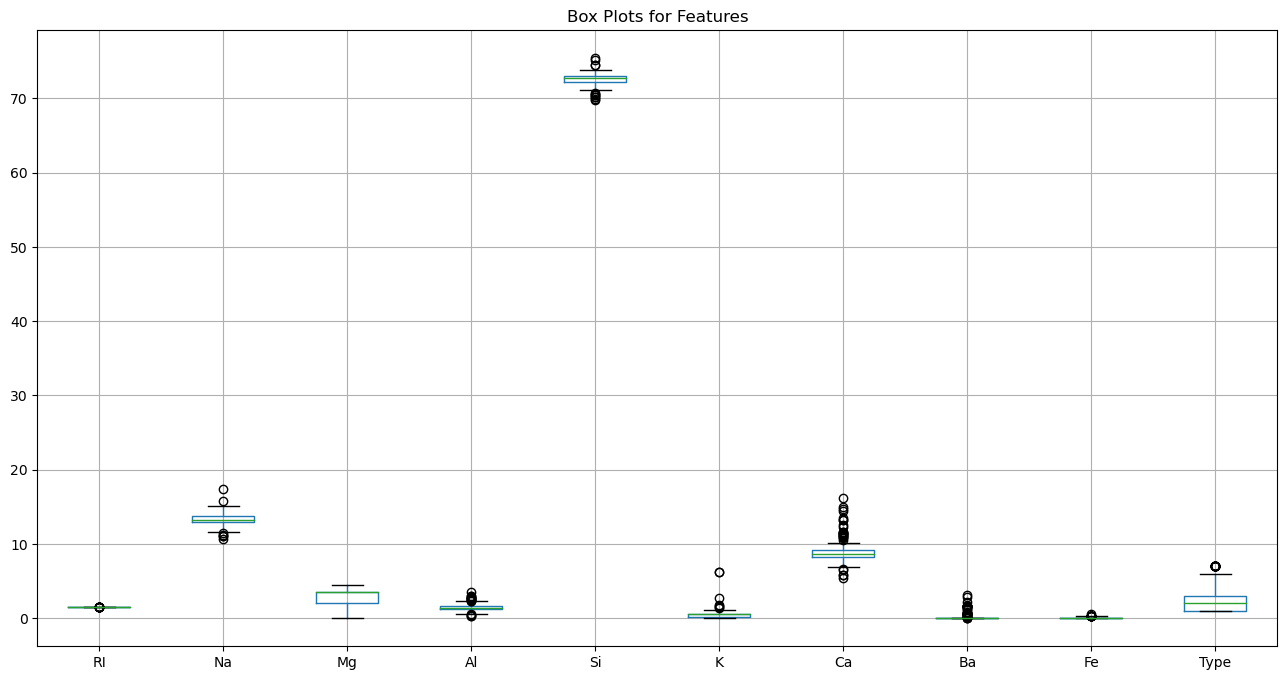

In [13]:
plt.figure(figsize=(16, 8))
df.boxplot()
plt.title("Box Plots for Features")
plt.show()

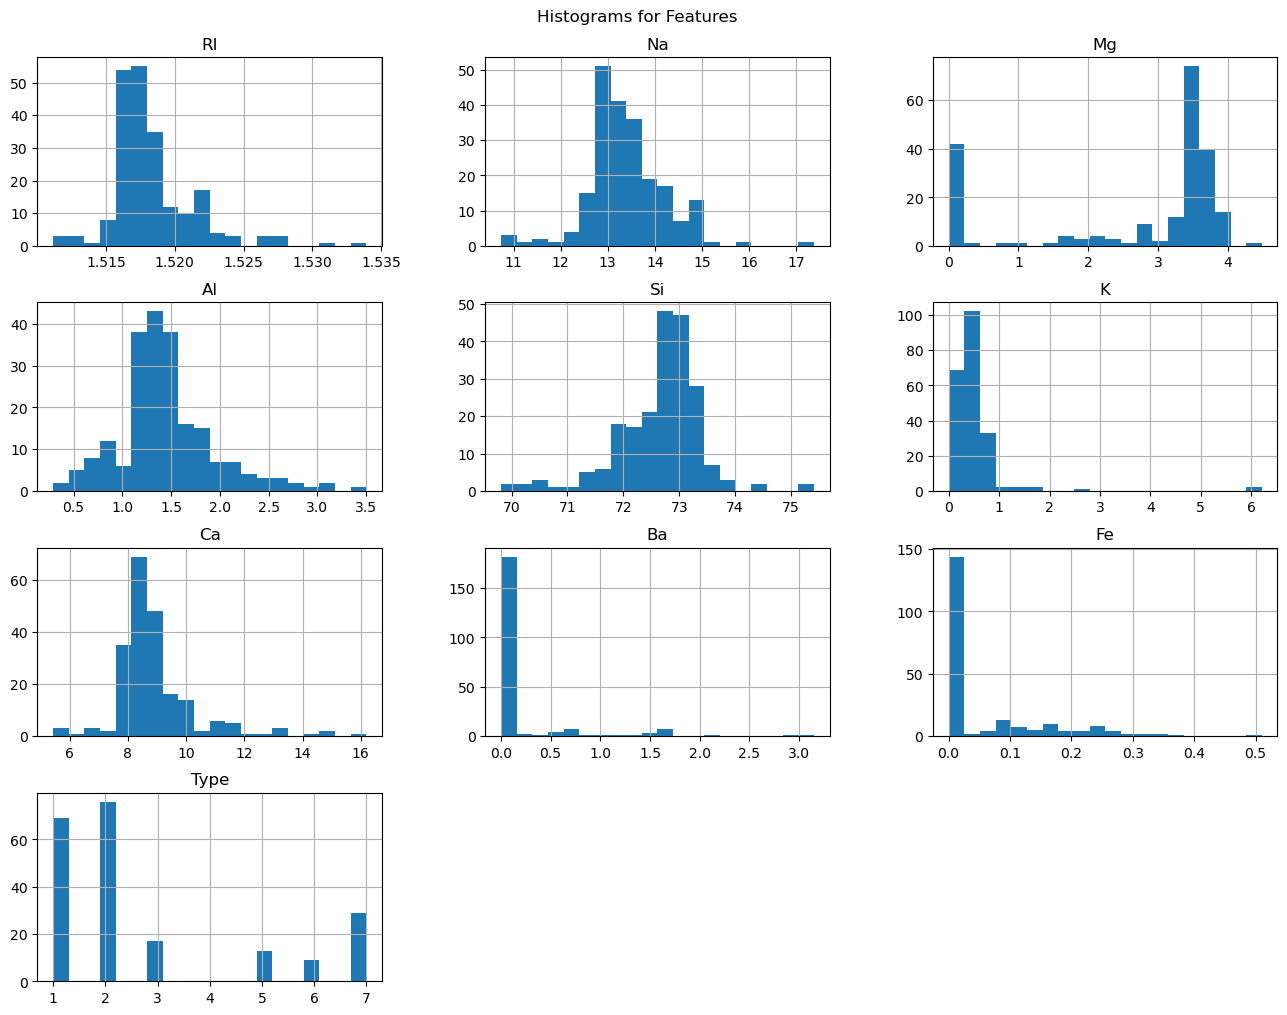

In [14]:
df.hist(figsize=(16, 12), bins=20)
plt.suptitle("Histograms for Features", y=0.92)
plt.show()

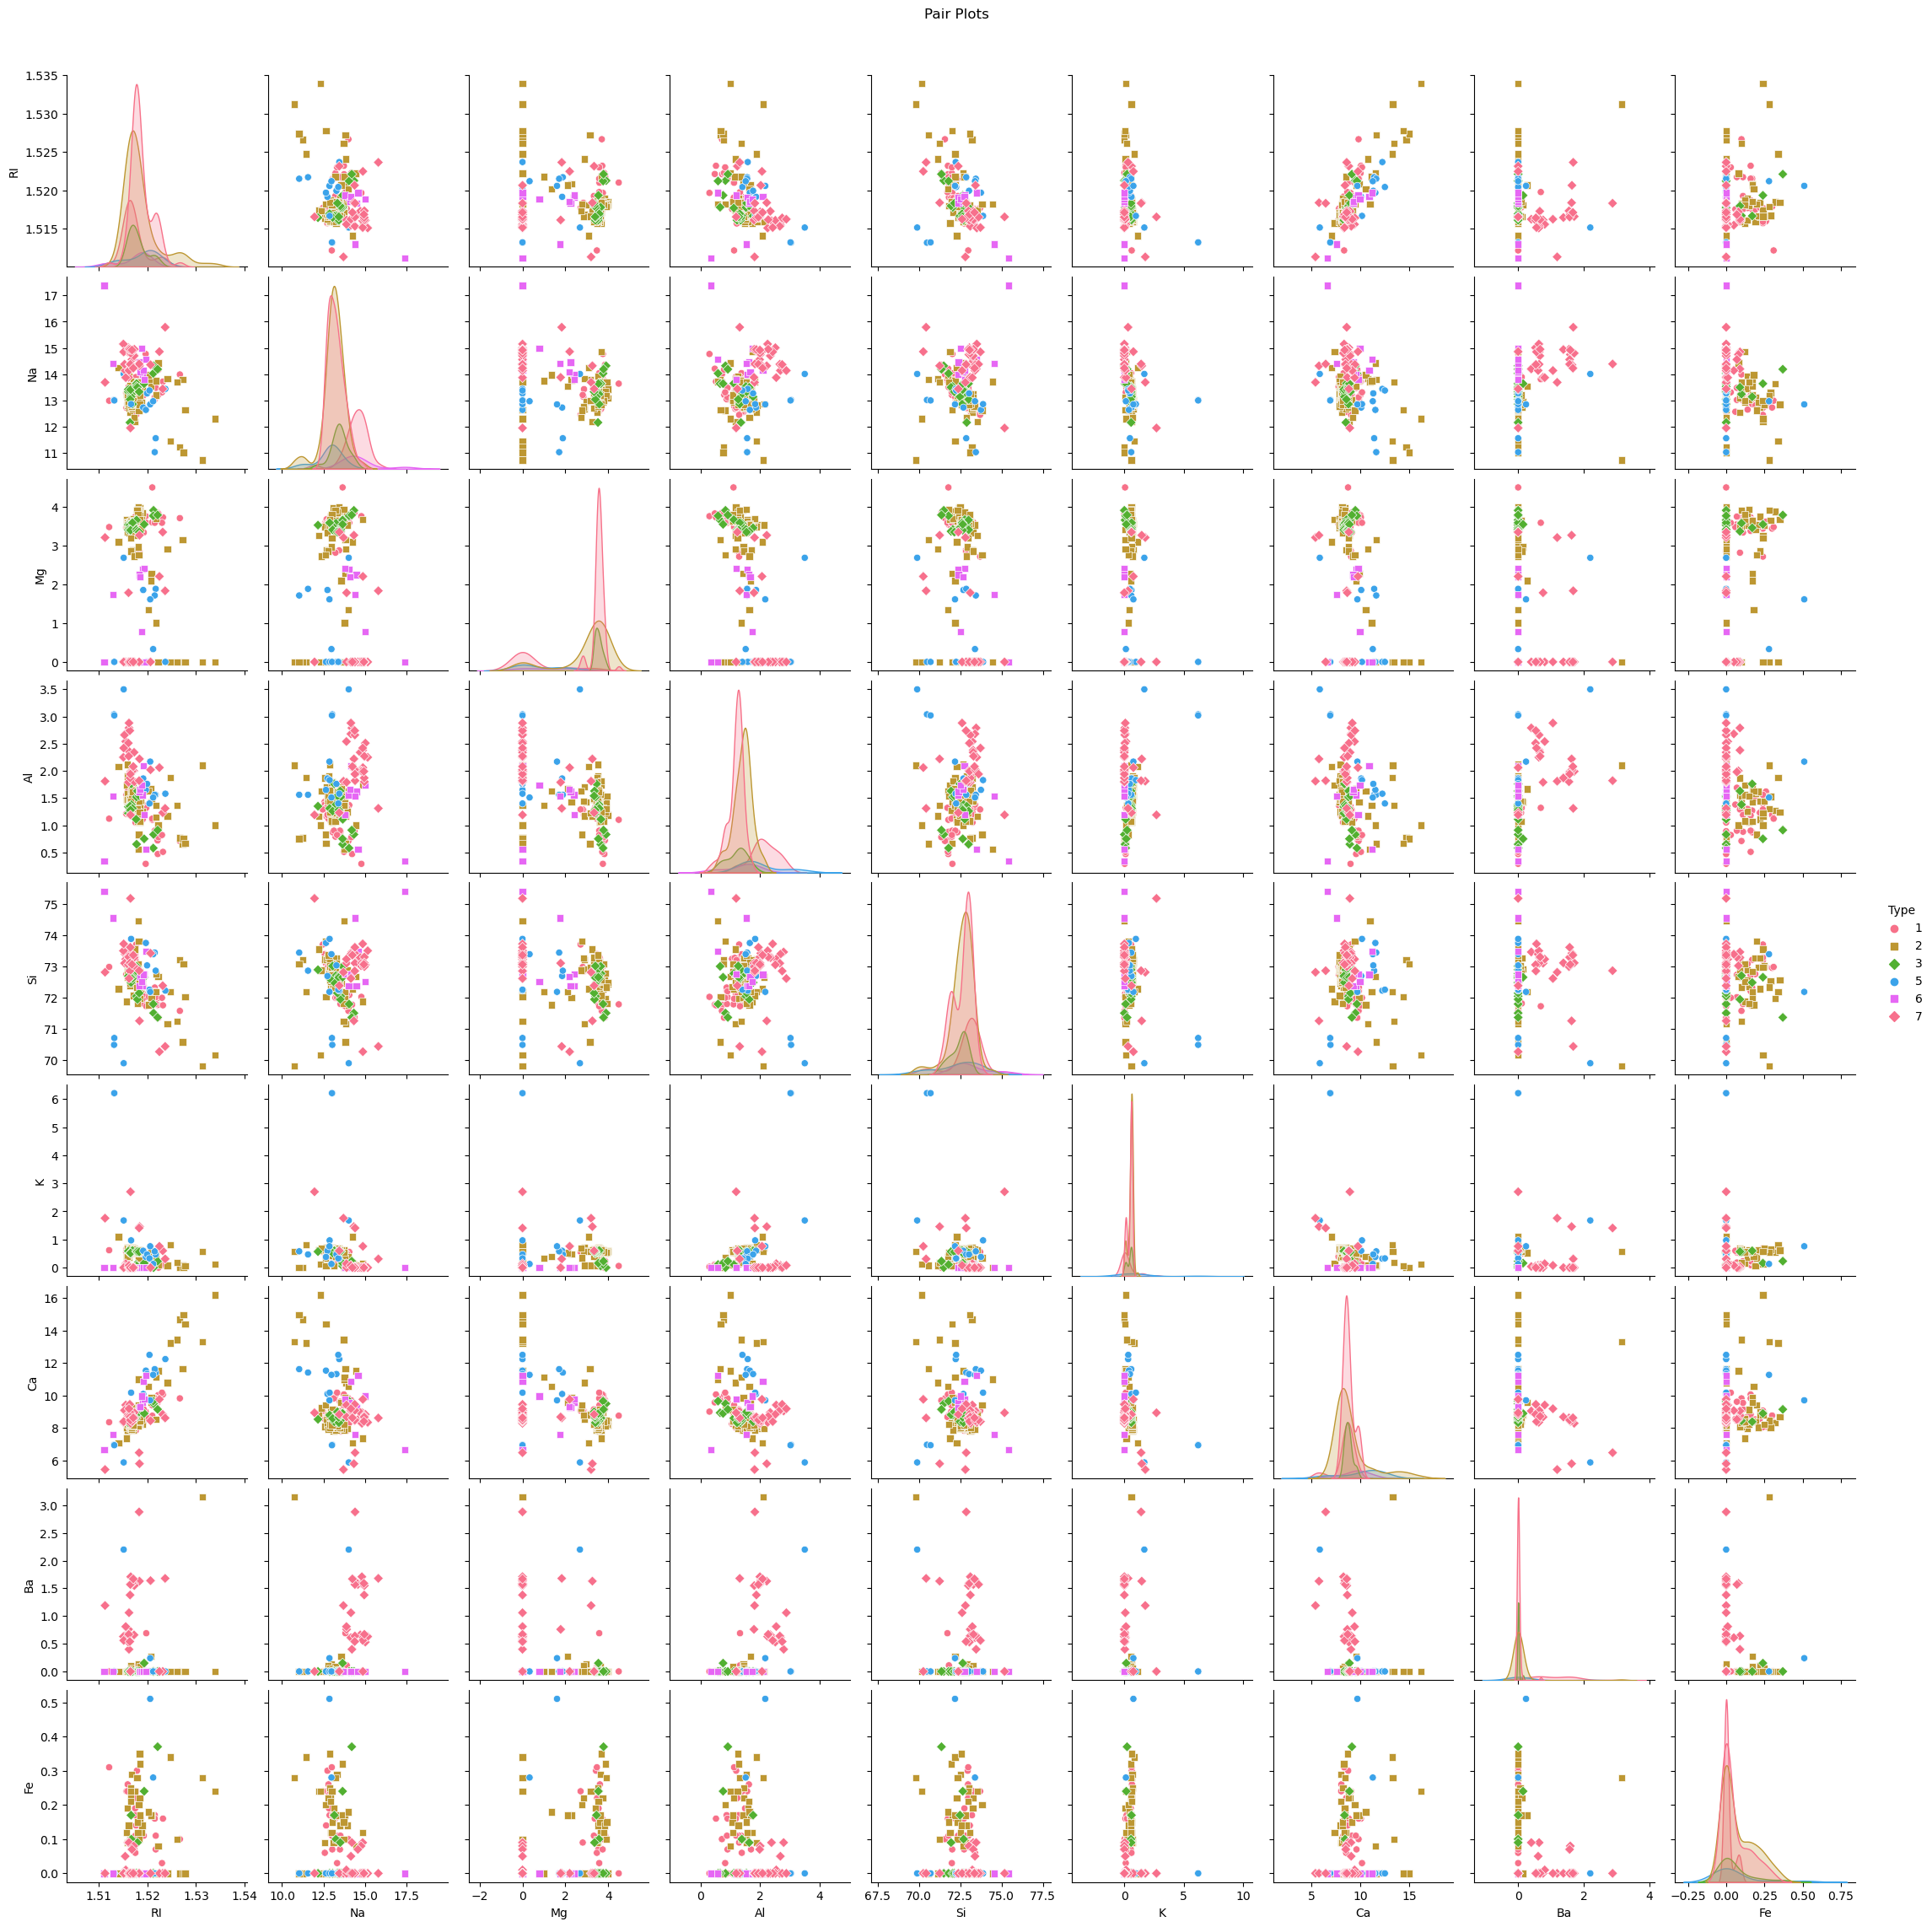

In [18]:
import warnings
warnings.filterwarnings('ignore')
# Pair plots
sns.pairplot(df, hue="Type", markers=["o", "s", "D"], palette="husl")
plt.suptitle("Pair Plots", y=1.02)
plt.show()

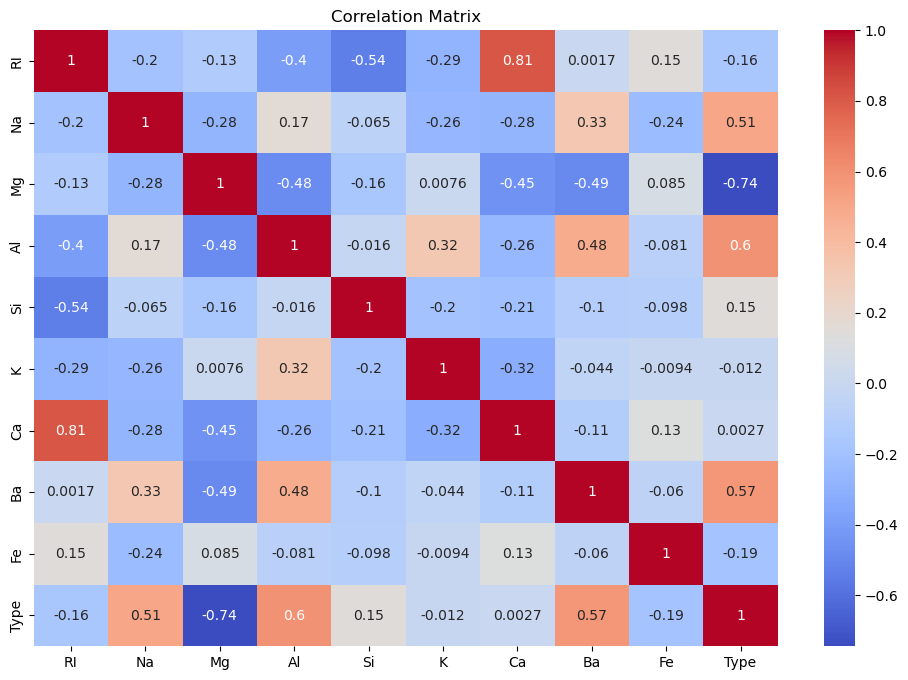

In [19]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [20]:
Y = df["Type"]
X = df.drop(columns=["Type"])

In [21]:
# Standardization
SS = StandardScaler()
X_scaled = SS.fit_transform(X)

# Remove outliers using IQR method
Q1 = np.percentile(X_scaled, 25, axis=0)
Q3 = np.percentile(X_scaled, 75, axis=0)
IQR = Q3 - Q1
outliers = (X_scaled < (Q1 - 1.5 * IQR)) | (X_scaled > (Q3 + 1.5 * IQR))
df_no_outliers = df[~outliers.any(axis=1)]

# Reset the index to ensure it is sequential
df_no_outliers.reset_index(drop=True, inplace=True)

In [22]:
# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_scaled, Y)
Y_pred_rf = random_forest.predict(X_scaled)
accuracy_rf = accuracy_score(Y, Y_pred_rf).round(2)
print("Random Forest Classifier Accuracy:", accuracy_rf)

Random Forest Classifier Accuracy: 1.0


In [23]:
# Hyperparameter tuning for KNN
param_grid = {'n_neighbors': range(1, 30)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_scaled, Y)
best_k = grid_search.best_params_['n_neighbors']
print("Best k for KNN:", best_k)

Best k for KNN: 2


In [24]:
# K-Nearest Neighbors (KNN)
KNN = KNeighborsClassifier(n_neighbors=best_k)

KNN_train = []
KNN_test = []

for i in range(1, 100):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    KNN.fit(X_train, Y_train)
    Y_pred_train = KNN.predict(X_train)
    Y_pred_test = KNN.predict(X_test)
    training_accuracy = accuracy_score(Y_train, Y_pred_train)
    test_accuracy = accuracy_score(Y_test, Y_pred_test)
    KNN_train.append(training_accuracy)
    KNN_test.append(test_accuracy)

print("Average Training Accuracy for KNN:", np.mean(KNN_train).round(3))
print("Average Test Accuracy for KNN:", np.mean(KNN_test).round(3))

Average Training Accuracy for KNN: 0.822
Average Test Accuracy for KNN: 0.679


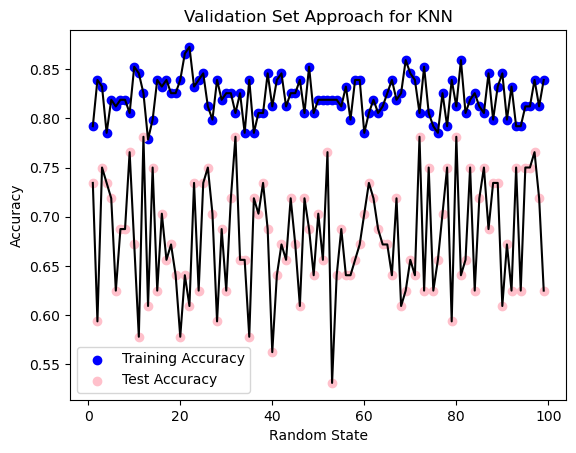

In [25]:
# Plot the results
plt.scatter(x=range(1, 100), y=KNN_train, color="blue", label="Training Accuracy")
plt.scatter(x=range(1, 100), y=KNN_test, color="pink", label="Test Accuracy")
plt.plot(range(1, 100), KNN_train, color="black")
plt.plot(range(1, 100), KNN_test, color="black")
plt.xlabel('Random State')
plt.ylabel('Accuracy')
plt.title('Validation Set Approach for KNN')
plt.legend()
plt.show()